In [4]:
"""
Statistics for the result's folder
"""
import pandas as pd
import numpy as np

In [5]:
"""
Load dataset
"""
DATA_PATH = "results/results.csv"
df = pd.read_csv(DATA_PATH)
agents_names = df["agent"].unique()
#check description
df["description"].values[1]

'Your description'

In [6]:
"""Adding stats"""
# Set 'tau' to 0 where 'agent' is 'REIN' or 'ReinMtrNet_Light'
df.loc[df['agent'].isin(['REIN', 'ReinMtrNet_Light']), 'tau'] = 0

# Calculate the average for each group and assign it to a new column 'avr_result'
df['avr_result'] = df.groupby(['agent', 'lr', 'tau'])['test'].transform('mean')

# Calculate the maximum for each group and assign it to a new column 'max_result'
df['max_result'] = df.groupby(['agent', 'lr', 'tau'])['test'].transform('max')

In [7]:
#check agents names
agents_names

array([nan, 'REIN'], dtype=object)

In [8]:
#check tau
df["lr"].value_counts()

lr
0.000000    1
0.000858    1
Name: count, dtype: int64

In [10]:
#check learning rates
df["tau"].value_counts()

tau
0.0    2
Name: count, dtype: int64

In [11]:
"""CHECK STATS"""
LR = 0.001
TAU = 1 #for REIN type = 0
df[(df["lr"] == LR) & (df["tau"] == TAU)][["tau","agent","avr_result", "max_result"]]

,tau,agent,avr_result,max_result


[600, 600, 600, 600, 600, 600]
[600, 600, 600, 600, 600, 600, 600, 600, 600, 600]
[600, 600, 600, 600, 600, 600]
[600, 600, 600, 600, 600, 600]


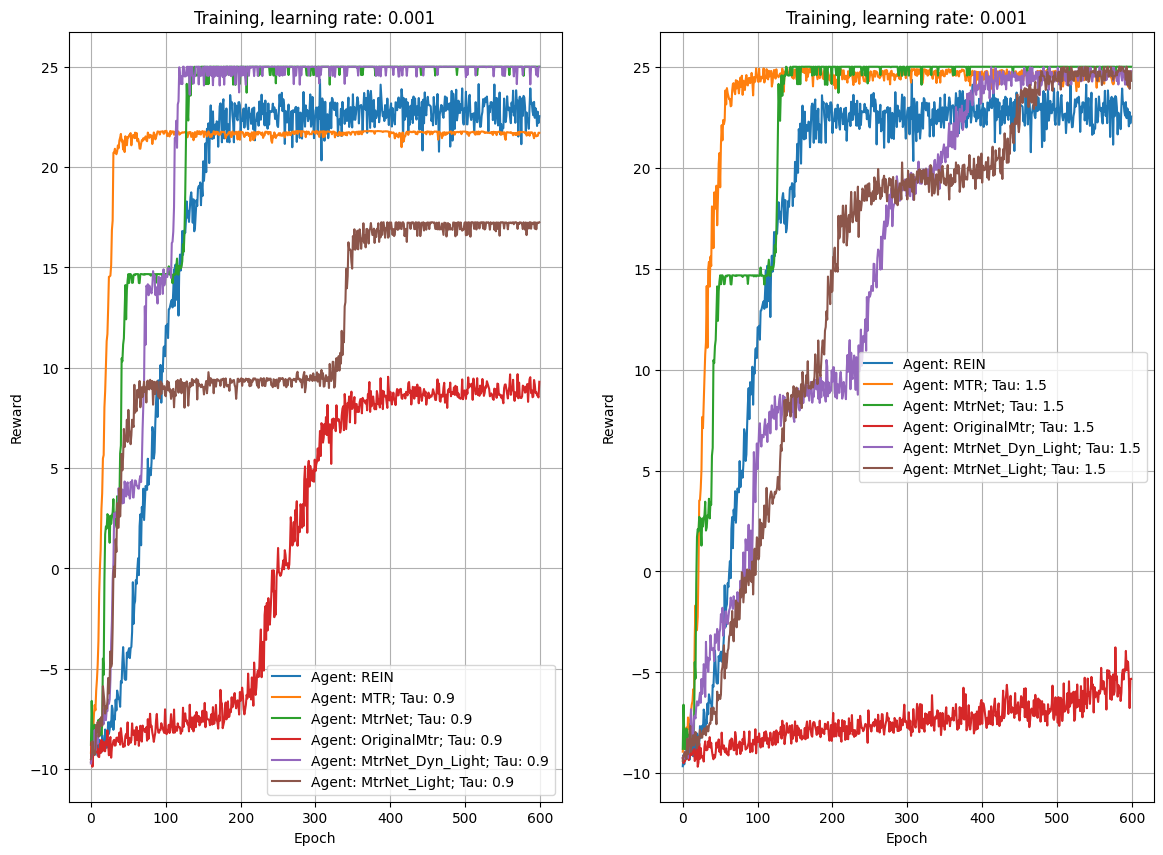

In [83]:
"""Plot"""
import matplotlib.pyplot as plt
import  json
SAVEFIG_NAME = "Lake"
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(1,2,1)


AGENT = "REIN"
LR = 0.001
TAU = 0#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
print(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}')



AGENT = "MTR"
LR = 0.001
TAU = 0.9#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
print(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')


AGENT = "MtrNet"
LR = 0.001
TAU = 0.9#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
i = 0
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
    i+=1
    if i==3:
        break
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')


AGENT = "OriginalMtr"
LR = 0.001
TAU = 0.9#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')

AGENT = "MtrNet_Dyn_Light"
LR = 0.001
TAU = 0.9#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')

AGENT = "MtrNet_Light"
LR = 0.001
TAU = 0.9#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')



ax1.set_xlabel('Epoch')
ax1.set_ylabel('Reward')
ax1.set_title(f'Training, learning rate: {LR}')
ax1.legend()
ax1.grid(True)



ax1 = fig.add_subplot(1,2,2)


AGENT = "REIN"
LR = 0.001
TAU = 0#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
print(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}')



AGENT = "MTR"
LR = 0.001
TAU = 1.5#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
print(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')


AGENT = "MtrNet"
LR = 0.001
TAU = 1.5#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
i = 0
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
    i+=1
    if i==3:
        break
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')


AGENT = "OriginalMtr"
LR = 0.001
TAU = 1.5#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')

AGENT = "MtrNet_Dyn_Light"
LR = 0.001
TAU = 1.5#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')

AGENT = "MtrNet_Light"
LR = 0.001
TAU = 1.5#for REIN type = 0
filtered_df =df[(df["agent"] == AGENT) & (df["lr"] == LR) & (df["tau"] == TAU)]
loss_list = []
for index, row in filtered_df.iterrows():
    loss_list.append(len(json.loads(row['train'])))
min_epoch = np.min(loss_list)
loss_list = []
for index, row in filtered_df.iterrows():
    array = json.loads(row['train'])
    loss_list.append(np.array(array[:min_epoch]))
all_sampels = np.array(loss_list)
average_loss = np.mean(all_sampels,axis=0)
ax1.plot(average_loss, label=f'Agent: {AGENT}; Tau: {TAU}')



ax1.set_xlabel('Epoch')
ax1.set_ylabel('Reward')
ax1.set_title(f'Training, learning rate: {LR}')
ax1.legend()
ax1.grid(True)
plt.savefig(f"images/{SAVEFIG_NAME}.jpeg")
plt.show()

-------
For optimal solution
-------

In [34]:
"""
Load dataset
"""
DATA_PATH = "results/optimality_test.csv"
df = pd.read_csv(DATA_PATH)
agents_names = df["agent"].unique()

In [35]:
agents_names

array([nan, 'OriginalMtr', 'MtrNet', 'MtrNet_Light'], dtype=object)

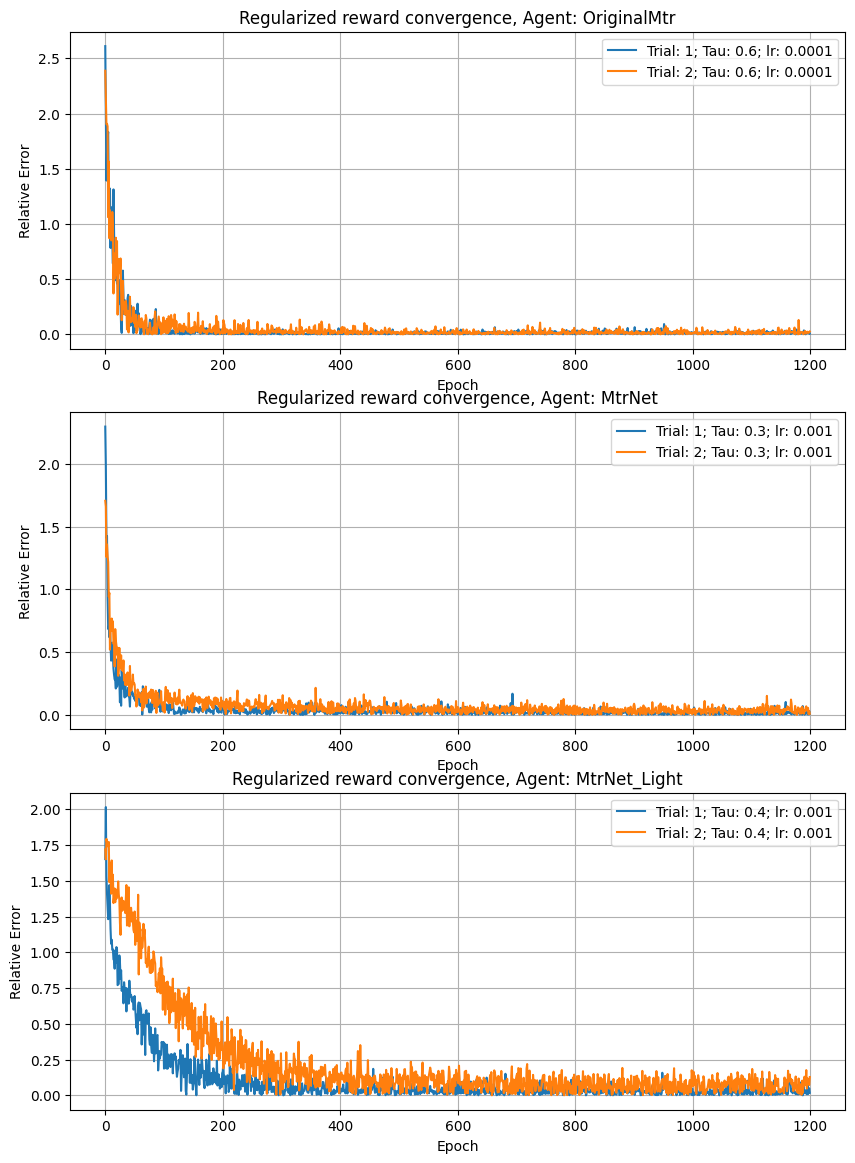

In [48]:
"""Plot"""
import matplotlib.pyplot as plt
import  json
fig = plt.figure(figsize=(10, 14))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
AGENT = "OriginalMtr"
filtered_df =df[(df["agent"] == AGENT)]
i = 1
for index, row in filtered_df.iterrows():
    array = np.abs(np.array(json.loads(row['train_entropy'])) - row["opt_sol"])/row["opt_sol"]
    ax1.plot(array[:1200], label=f'Trial: {i}; Tau: {row["tau"]}; lr: {row["lr"]}')
    i+=1
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Relative Error')
ax1.set_title(f'Regularized reward convergence, Agent: {AGENT}')
ax1.legend()
ax1.grid(True)
AGENT = "MtrNet"
filtered_df =df[(df["agent"] == AGENT)]
i = 1
for index, row in filtered_df.iterrows():
    array = np.abs(np.array(json.loads(row['train_entropy'])) - row["opt_sol"])/row["opt_sol"]
    ax2.plot(array[:1200], label=f'Trial: {i}; Tau: {row["tau"]}; lr: {row["lr"]}')
    i+=1
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Relative Error')
ax2.set_title(f'Regularized reward convergence, Agent: {AGENT}')
ax2.legend()
ax2.grid(True)

AGENT = "MtrNet_Light"
filtered_df =df[(df["agent"] == AGENT)]
i = 1
for index, row in filtered_df.iterrows():
    array = np.abs(np.array(json.loads(row['train_entropy'])) - row["opt_sol"])/row["opt_sol"]
    ax3.plot(array, label=f'Trial: {i}; Tau: {row["tau"]}; lr: {row["lr"]}')
    i+=1
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Relative Error')
ax3.set_title(f'Regularized reward convergence, Agent: {AGENT}')
ax3.legend()
ax3.grid(True)


plt.savefig("images/opt_test_.jpeg")
plt.show()